# Let's make this a new visualization notebook

In [18]:
from plotly3d.plot import scatter, trajectories

In [19]:
# Here we retrieve the mean and std vals from the original embeddings

In [20]:
trajectoriespts = trajectoriespts * std_vals + mean_vals
generated = generated * std_vals + mean_vals
true_data = df[[f'd{i}' for i in range(1, len(df.columns))]] * std_vals + mean_vals

In [21]:
true_data

d1        d2        d3        d4        d5        d6        d7  \
0    -0.005074  0.012446  0.000141  0.001613  0.001494 -0.000953 -0.000802   
1    -0.001805  0.010058  0.000074  0.005981 -0.001677 -0.003246 -0.000704   
2     0.006512  0.002692  0.009946  0.003665  0.001373  0.000939 -0.000276   
3    -0.003230  0.010997  0.002212  0.001667  0.000574 -0.003473  0.000325   
4    -0.045235 -0.026611 -0.007547  0.004111 -0.003171  0.000579  0.000802   
...        ...       ...       ...       ...       ...       ...       ...   
4185  0.017787 -0.004484 -0.000782 -0.000455 -0.001309  0.001284  0.002084   
4186  0.019124 -0.006927 -0.005322 -0.002009 -0.003305  0.001616  0.003257   
4187  0.016144 -0.002378  0.000483  0.002381 -0.000935  0.003195  0.000680   
4188  0.017555 -0.004100 -0.003861  0.001278 -0.003388  0.002851  0.002816   
4189  0.014756 -0.000998  0.000275  0.002866 -0.002618  0.003270  0.001267   

            d8        d9       d10  
0    -0.000796 -0.000019  0.000490  
1     0.001897  0.000708  0.000284  
2    -0.001663  0.000842 -0.000683  
3    -0.001266 -0.000143  0.000806  
4    -0.001192  0.000145  0.000235  
...        ...       ...       ...  
4185 -0.001024 -0.000395  0.000221  
4186 -0.001562 -0.000606  0.000852  
4187  0.000868  0.000240 -0.000469  
4188 -0.000724  0.000520 -0.000634  
4189  0.000910 -0.000144 -0.000550  

[4190 rows x 10 columns]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(true_data)
trajectories(
    trajectoriespts,
    fig=scatter(
        true_data.values, 
        df['samples'].values,
        scaler=scaler,
        # rescale=False,
        s=5,
        alpha=1,
    ), 
    scaler=scaler,
    s=1,
    # rescale=False,
    filename=os.path.join(exp_dir, 'trajectories.html'),
    title='',
)

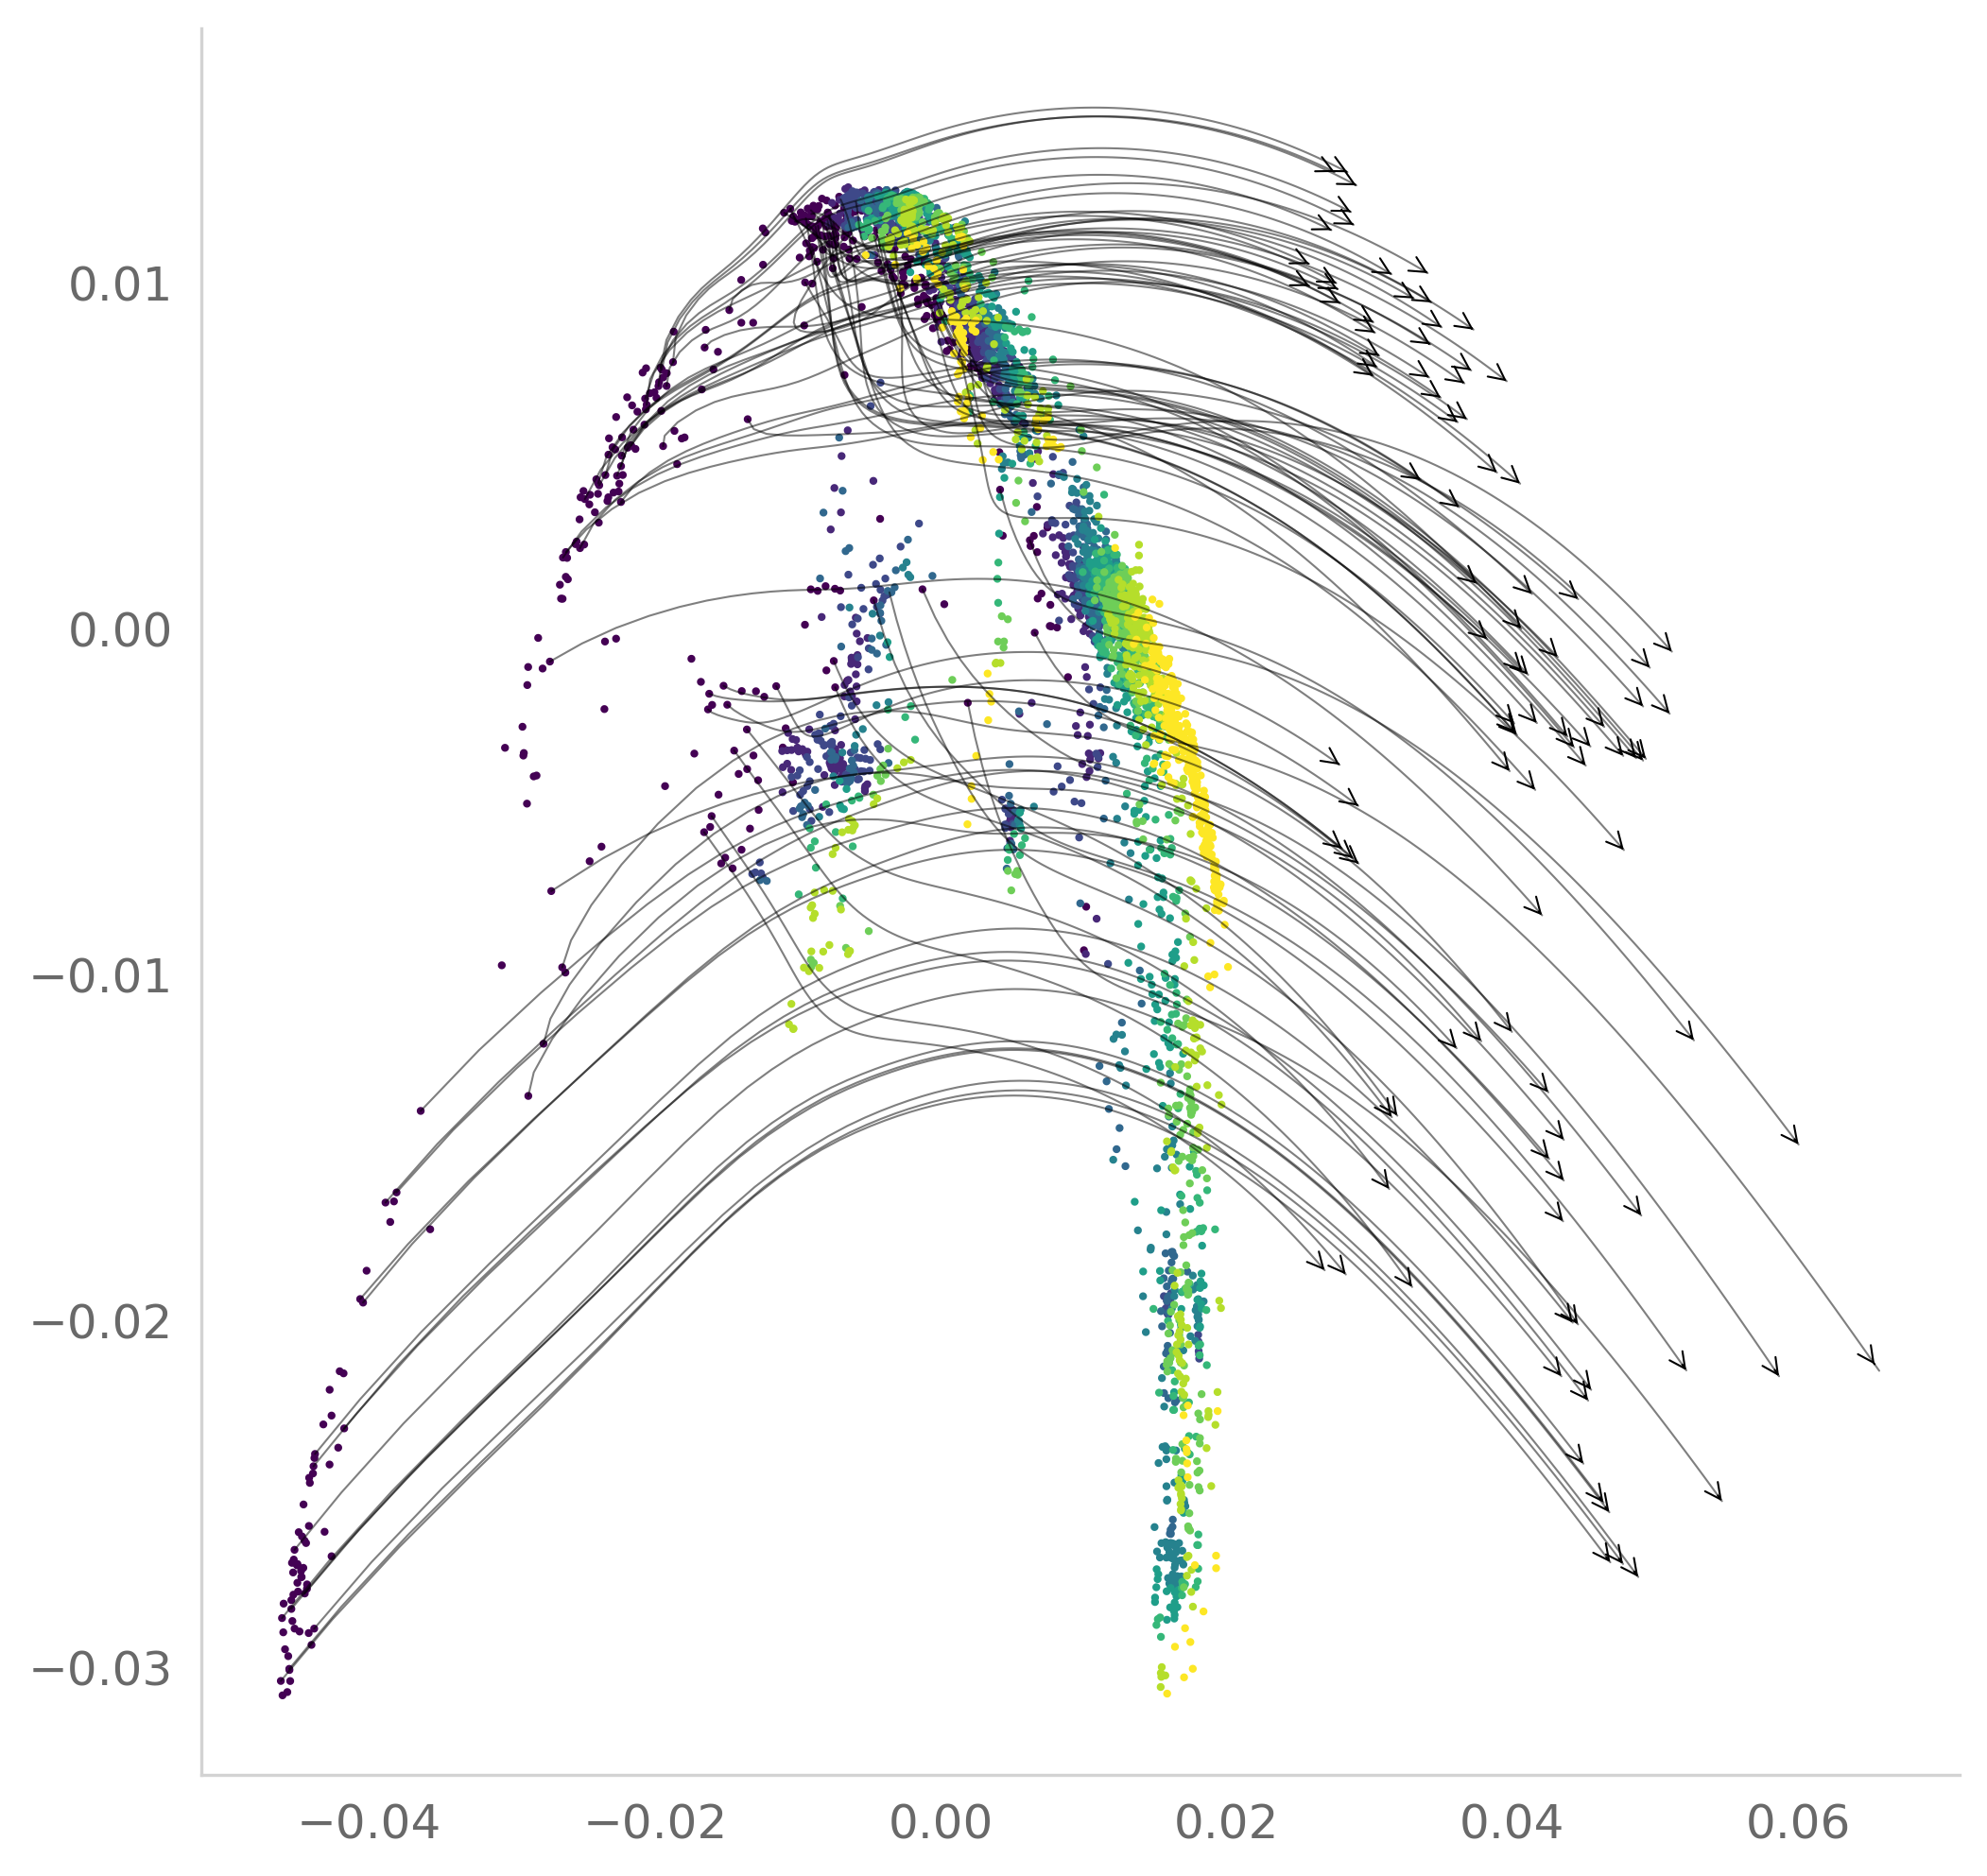

In [24]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(true_data.values[:, 0], true_data.values[:, 1], c=df['samples'].values, cmap='viridis', s=1)
for i,traj in enumerate(np.transpose(trajectoriespts, axes=(1,0,2))):
    # widths = m_traj[:,i]
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))


In [29]:
from omics_toolbox.dimchanger import DimChanger

dimchanger = DimChanger.load('../../dimension_changer')

In [34]:
dimchanger.phate_scaler

StandardScaler()

In [32]:
traj_shapes = trajectoriespts.shape
traj_flat = trajectoriespts.reshape(-1, trajectoriespts.shape[-1])
phate_vis = dimchanger.phate2vis(true_data.values)
trajvis = dimchanger.phate2vis(traj_flat)
trajvis = trajvis.reshape(traj_shapes[0], traj_shapes[1], -1)
trajend = trajectoriespts[-1, :, :]
trajendvis = dimchanger.phate2vis(trajend)
unatraj = trajectoriespts[:, 0, :]
unatrajvis = dimchanger.phate2vis(unatraj)

ValueError: X has 10 features, but StandardScaler is expecting 2 features as input.

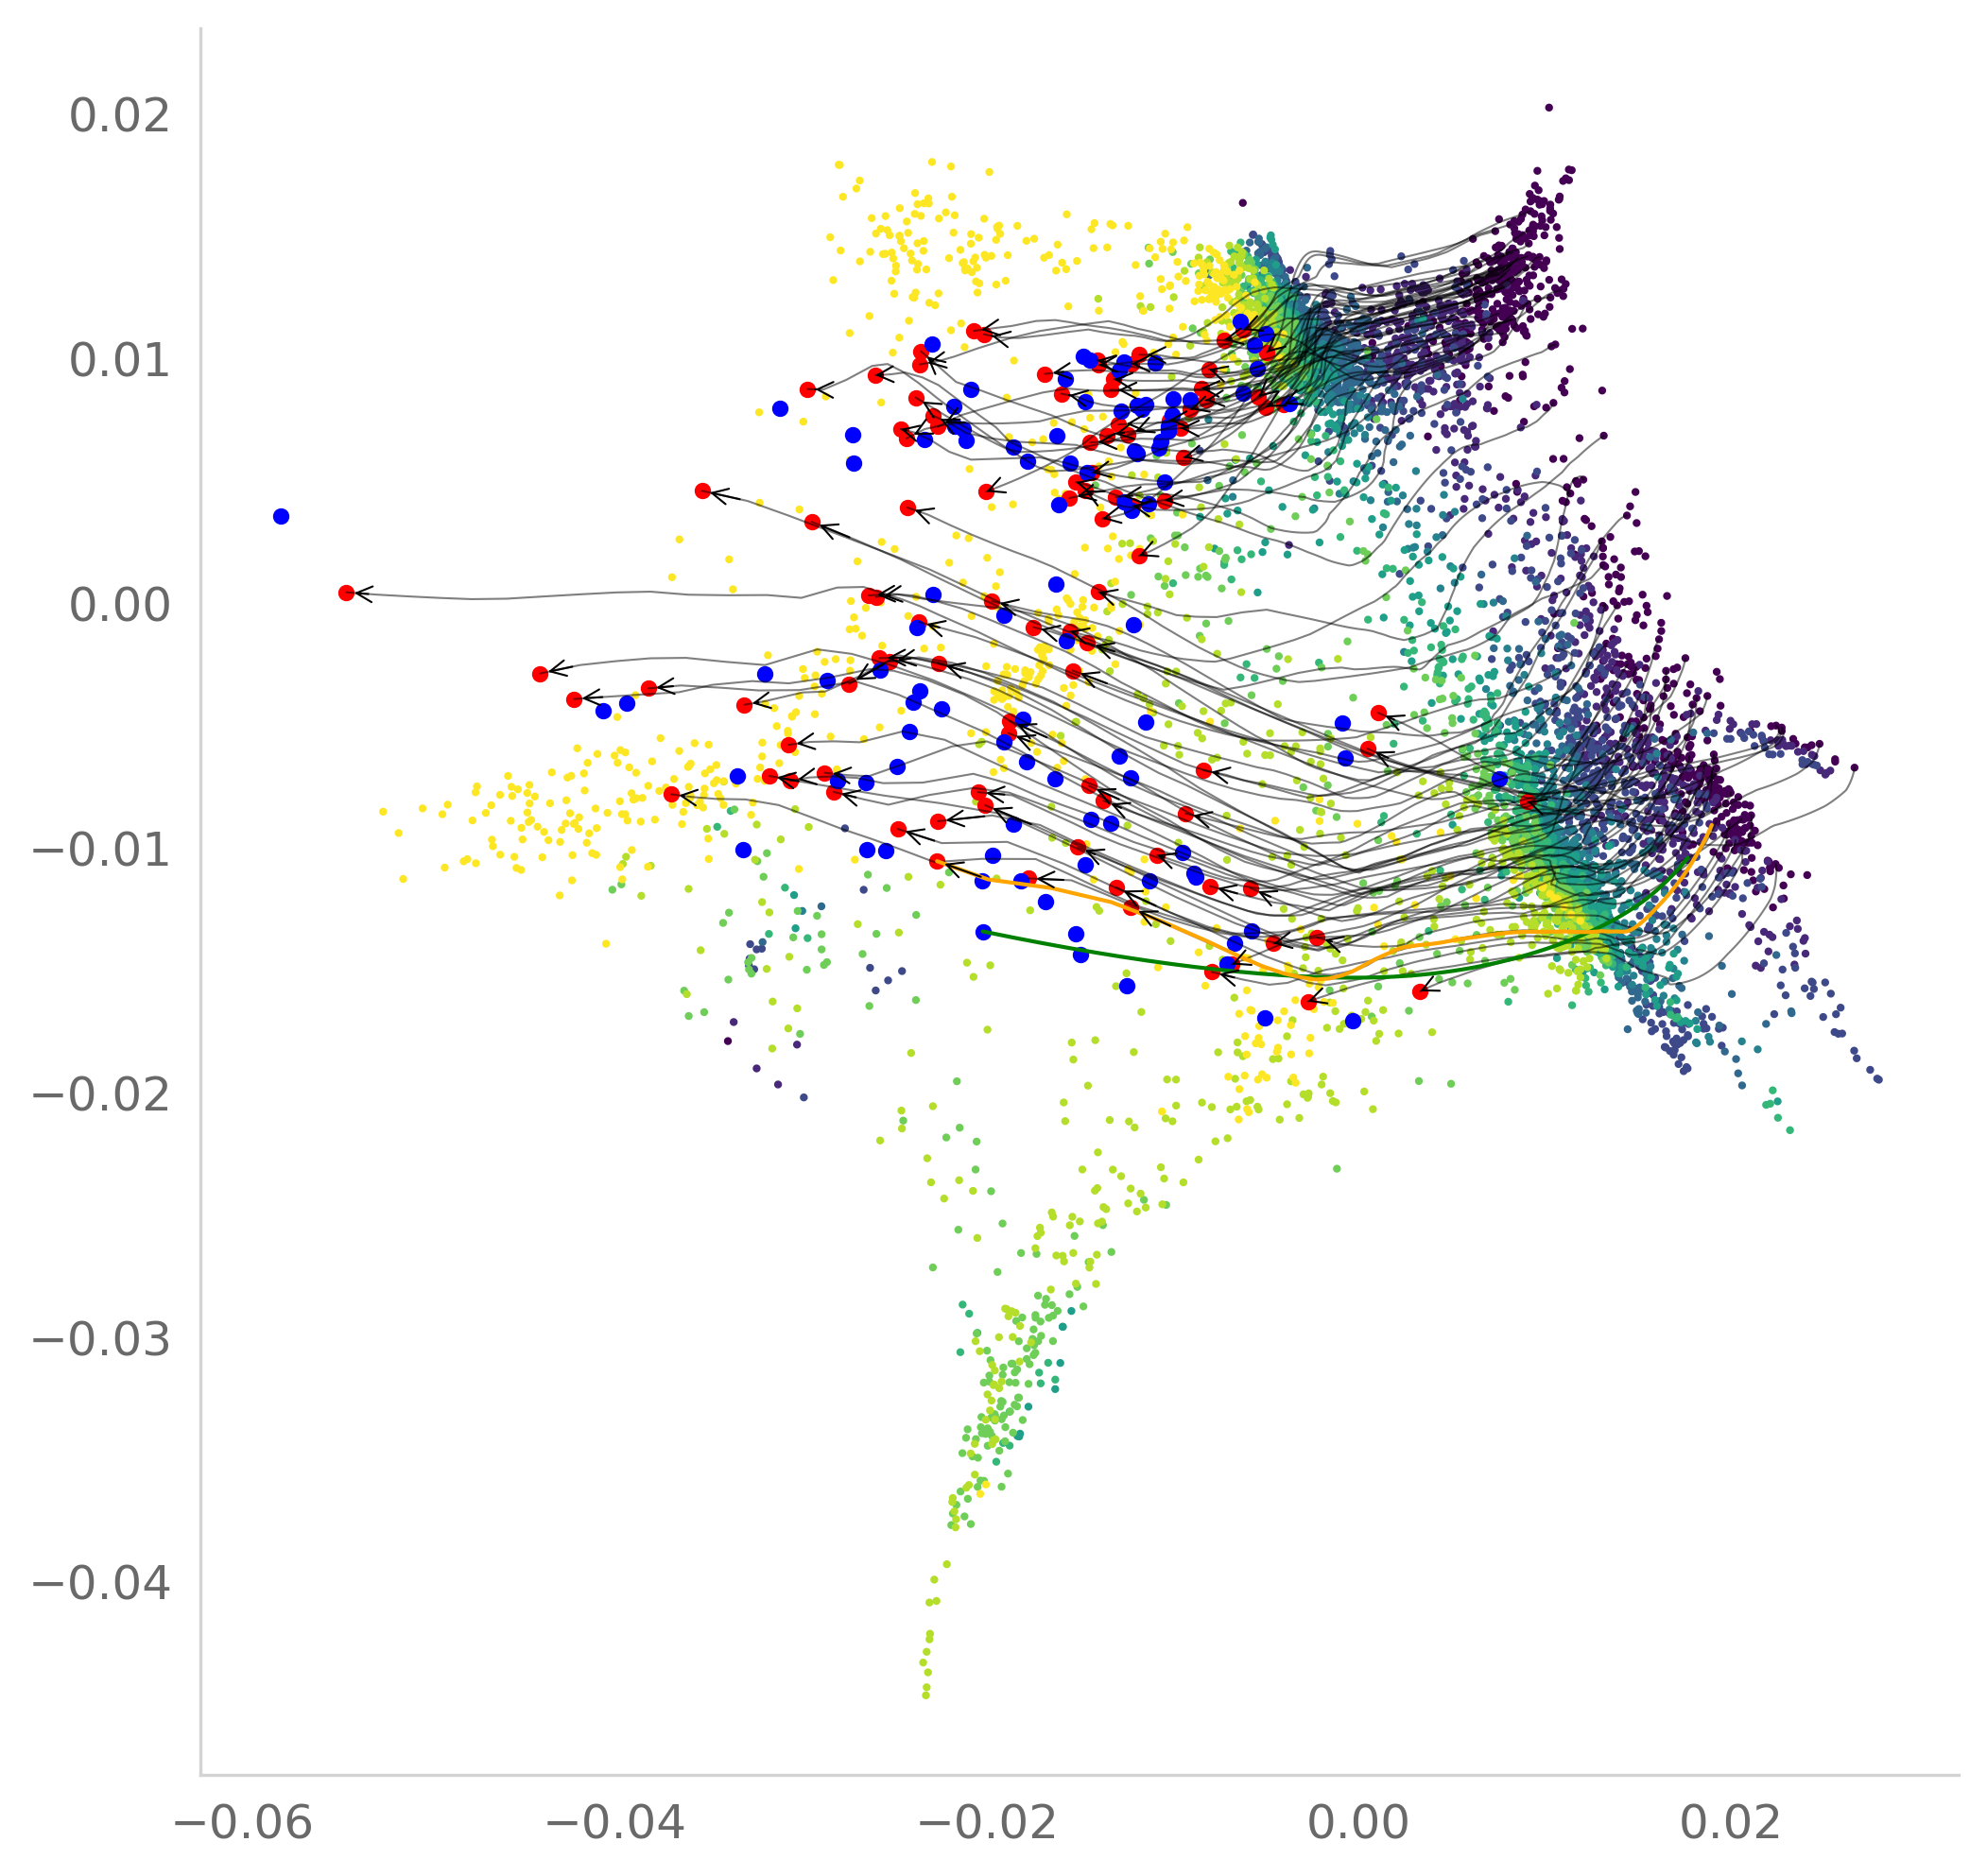

In [ ]:
fig = plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(phate_vis[:, 0], phate_vis[:, 1], c=df['samples'].values, cmap='viridis', s=1)
for i,traj in enumerate(np.transpose(trajvis, axes=(1,0,2))):
# for i,traj in enumerate(trajvis):
    plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
    plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
                 arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))
plt.scatter(trajendvis[:, 0], trajendvis[:, 1], c='Red', s=10)
plt.scatter(trajend[:, 0], trajend[:, 1], c='Blue', s=10)
plt.plot(unatraj[:, 0], unatraj[:, 1], c='Green', linewidth=1)
plt.plot(unatrajvis[:, 0], unatrajvis[:, 1], c='Orange', linewidth=1)

the model mapping from high dimensional phate to 2d seems to give noisy outputs. for the moment, I would just visualize the first 2 dimensions of the high dimensional phate space.

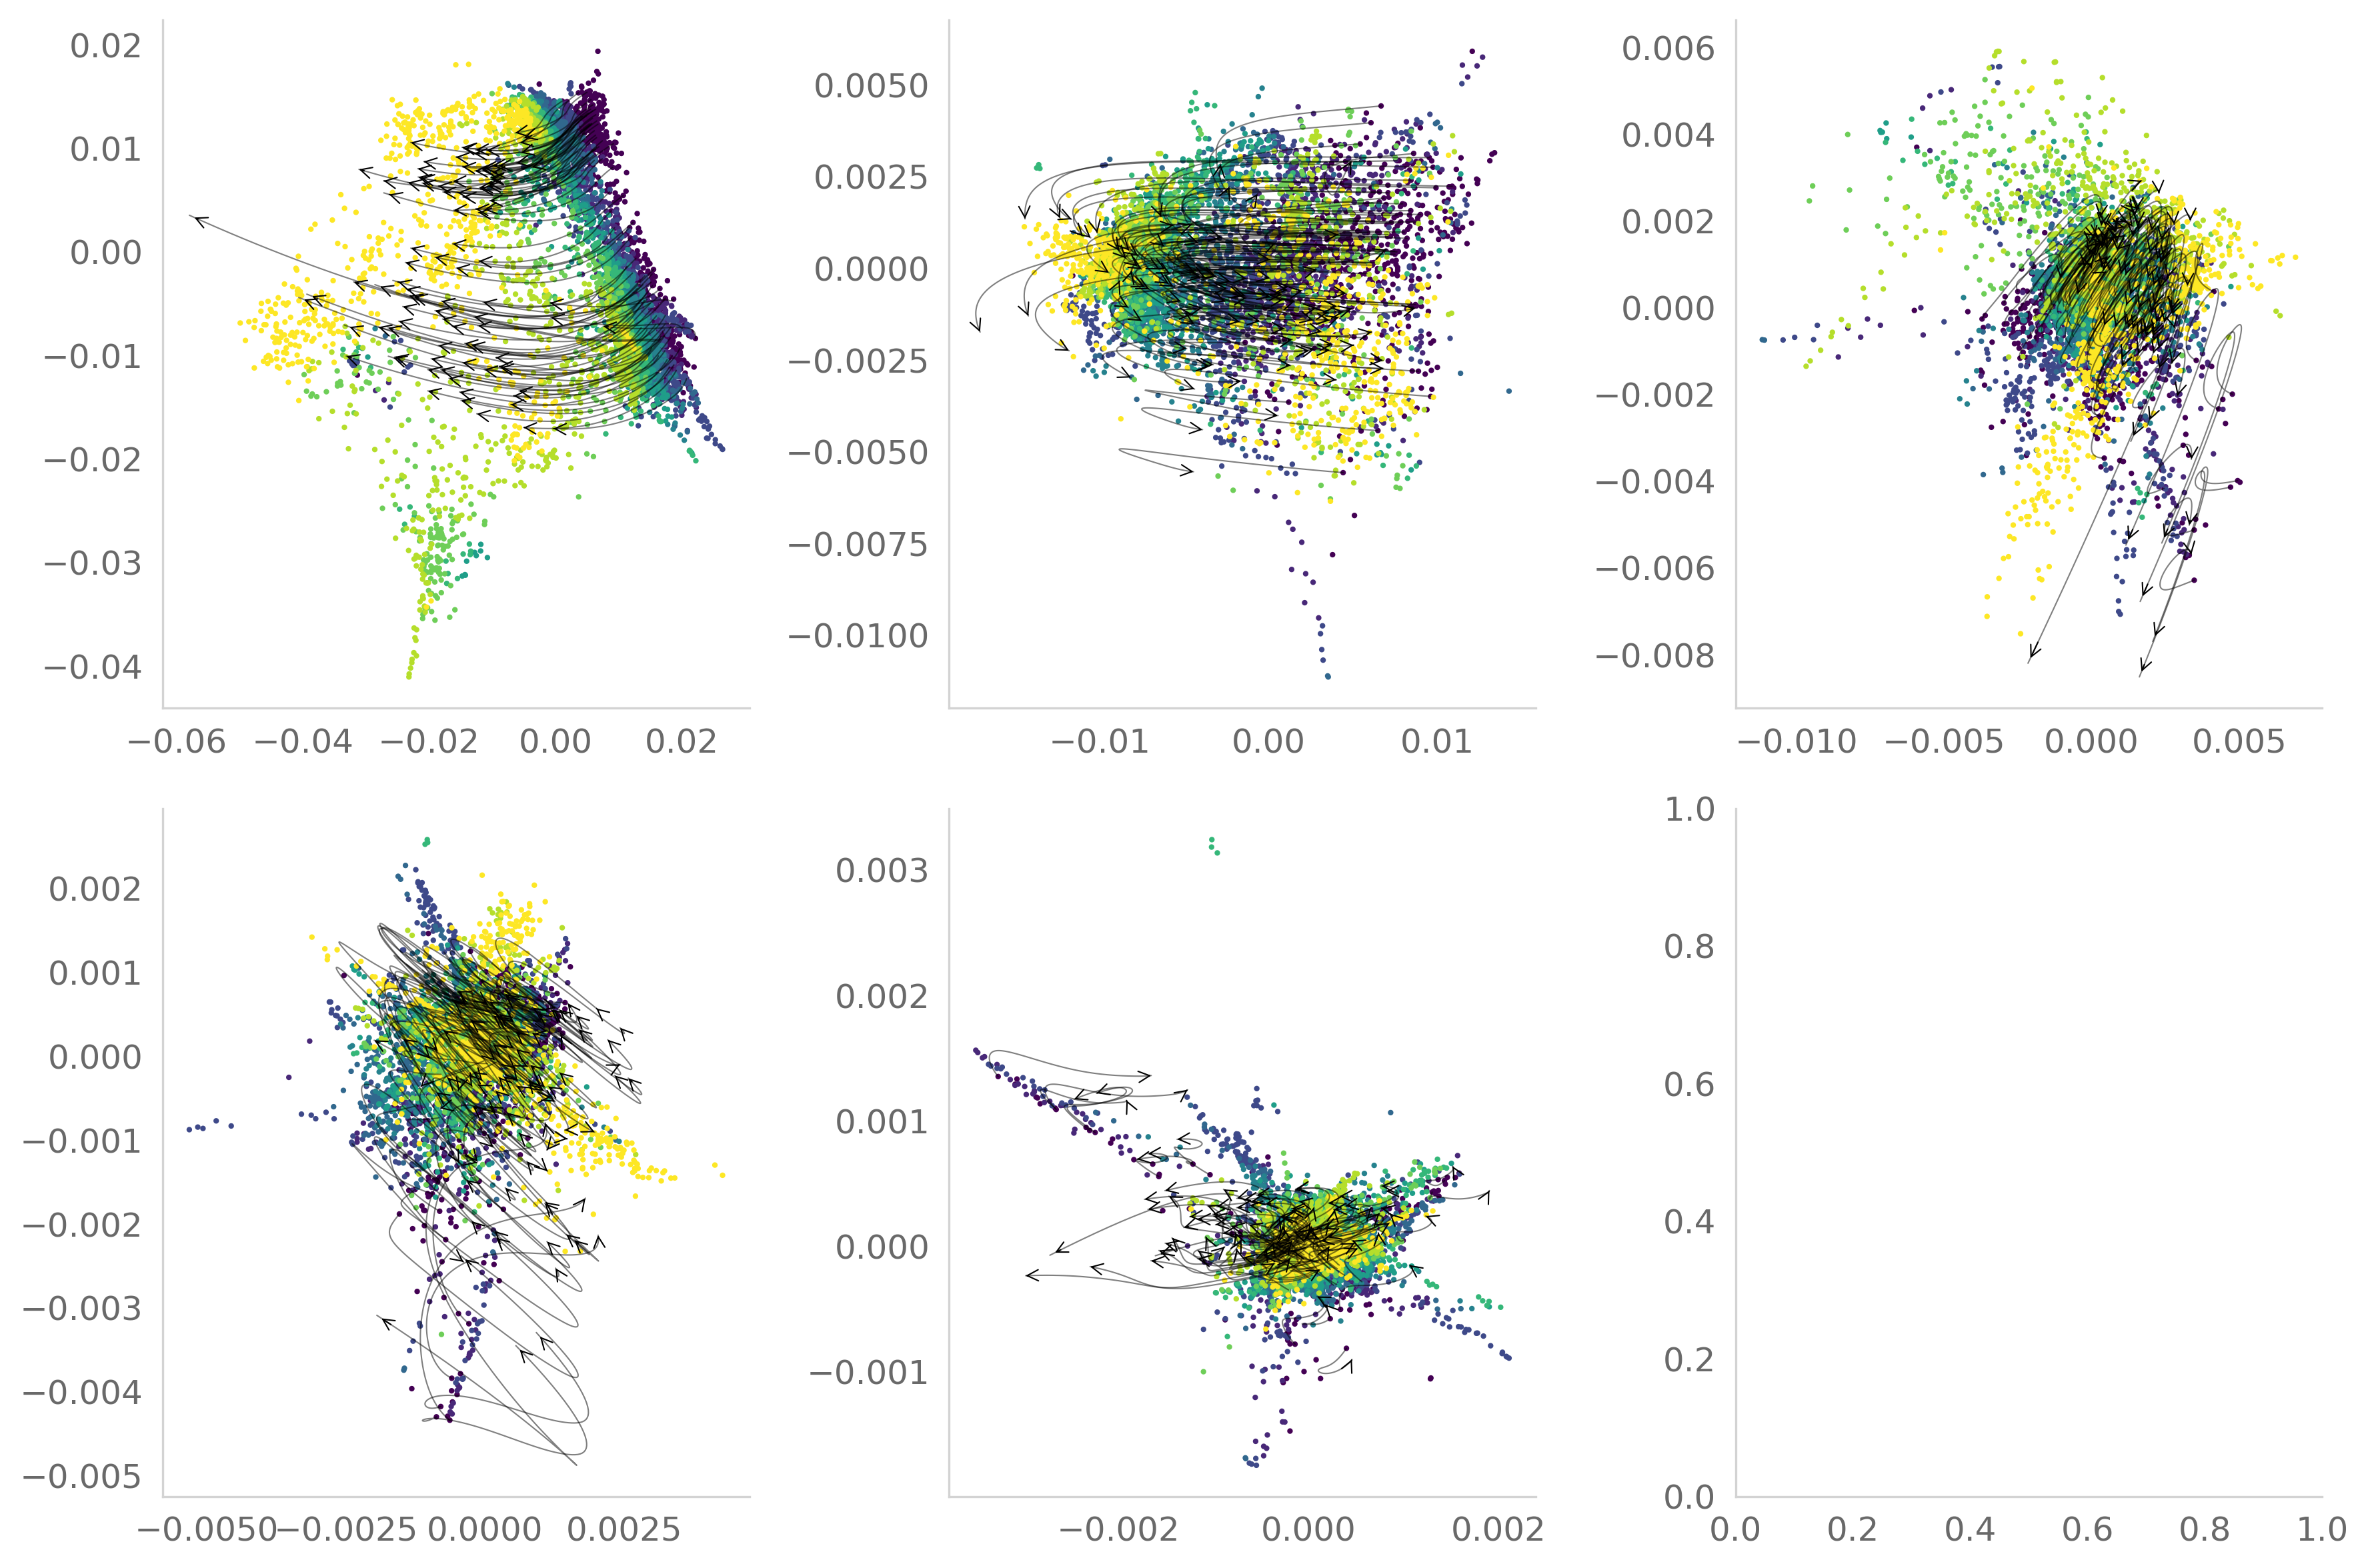

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=300)
dims_list = [[i, i+1] for i in range(0, 10, 2)]
for idx, (dims, ax) in enumerate(zip(dims_list, axs.flat)):
    ax.scatter(true_data.values[:, dims[0]], true_data.values[:, dims[1]], c=df['samples'].values, cmap='viridis', s=1)
    for i,traj in enumerate(np.transpose(trajectoriespts, axes=(1,0,2))):
        # widths = m_traj[:,i]
        ax.plot(traj[:, dims[0]], traj[:, dims[1]], alpha=.5, linewidth=.5, color='Black');
        ax.annotate('', xy=(traj[-1, dims[0]], traj[-1, dims[1]]), xytext=(traj[-2, dims[0]], traj[-2, dims[1]]),
                    arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))
plt.tight_layout()


In [ ]:
# fig = plt.figure(figsize=(12, 8), dpi=300)
# plt.scatter(adata.obsm['X_gaga'][:, 0], adata.obsm['X_gaga'][:, 1], c=adata.obs['meld_likelihood'].values, cmap='viridis', s=1)
# plt.colorbar(label='MELD likelihood')
# plt.xticks([])
# plt.yticks([])
# plt.xlabel('GAGA1')
# plt.ylabel('GAGA2')
# plt.title(f'{data_name}', fontsize=12)
# for i,traj in enumerate(np.transpose(trajectoriespts, axes=(1,0,2))):
#     # widths = m_traj[:,i]
#     plt.plot(traj[:, 0], traj[:, 1], alpha=.5, linewidth=.5, color='Black');
#     plt.annotate('', xy=(traj[-1, 0], traj[-1, 1]), xytext=(traj[-2, 0], traj[-2, 1]),
#                  arrowprops=dict(arrowstyle='->', color='Black', lw=.5, mutation_scale=10))


In [ ]:
# saving the trajectories and generated points
np.save(os.path.join(exp_dir,'trajectories_phate.npy'),trajectoriespts)
np.save(os.path.join(exp_dir,'generated_phate.npy'),generated)
np.savez(os.path.join(exp_dir, 'normalize.npz'), mean=trajectories, std=std_)

In [ ]:
#Temporary fix for the logger
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

In [ ]:
torch.save(model, exp_dir + '/model.pt')

In [ ]:
torch.save(autoencoder, exp_dir + '/autoencoder.pt')